In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Practice/Machine Learning A-Z (Model Selection)/Classification/Data.csv')
X = df.iloc[:,: -1].values
y = df.iloc[:, -1].values

In [3]:
df.head(10).style.hide_index()

Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2
1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [24]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.count()

Sample code number             683
Clump Thickness                683
Uniformity of Cell Size        683
Uniformity of Cell Shape       683
Marginal Adhesion              683
Single Epithelial Cell Size    683
Bare Nuclei                    683
Bland Chromatin                683
Normal Nucleoli                683
Mitoses                        683
Class                          683
dtype: int64

In [7]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

# Splitting the training and test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
print(X_train)

[[-1.38219432  0.91903747  0.9407658  ...  2.22576767  2.27129602
   0.24623928]
 [ 0.03390689  1.27578287 -0.04290763 ...  1.82407819  1.94996317
   3.74830911]
 [ 0.22797663  1.27578287  2.25233038 ...  2.62745714  2.27129602
  -0.33743902]
 ...
 [ 0.16939025 -1.22143494 -0.69868992 ... -0.98774815 -0.62069958
  -0.33743902]
 [ 0.29888258 -0.50794414 -0.69868992 ... -0.58605867 -0.62069958
  -0.33743902]
 [-1.04129794  1.98927367  1.92443923 ...  1.42238871  1.30729749
  -0.33743902]]


In [11]:
print(X_test)

[[ 0.11037076 -1.22143494 -0.69868992 ... -0.98774815 -0.62069958
  -0.33743902]
 [ 0.08526811 -0.50794414 -0.69868992 ... -0.58605867 -0.62069958
  -0.33743902]
 [-0.56596836  0.20554667  0.61287466 ...  0.21732028  0.02196611
  -0.33743902]
 ...
 [-0.48116108  0.20554667 -0.69868992 ... -0.18436919 -0.62069958
   0.24623928]
 [ 0.05794779 -0.86468954 -0.37079877 ...  1.42238871 -0.62069958
  -0.33743902]
 [ 0.09172701 -0.86468954 -0.69868992 ... -0.18436919 -0.62069958
  -0.33743902]]


# **CLASSIFICATION MODELS WITH CM AND ACC**

# LogisticRegression

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

[[103   4]
 [  5  59]]
0.9473684210526315


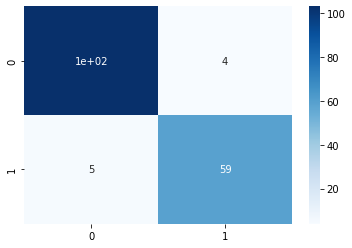

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)
print(cm_lr)
ac_lr = accuracy_score(y_test, y_pred)
print(ac_lr)
sns.heatmap(cm_lr, annot = True, cmap = 'Blues')

# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, algorithm = 'auto', metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

[[103   4]
 [  5  59]]
0.9473684210526315


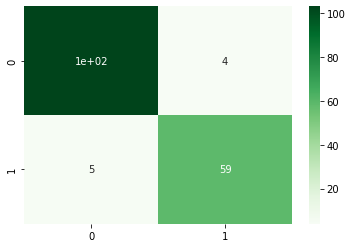

In [15]:
y_pred = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
ac_knn = accuracy_score(y_test, y_pred)
print(ac_knn)
sns.heatmap(cm_knn, annot = True, cmap = 'Greens')

# SVM

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', degree = 3, random_state = 0)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

[[102   5]
 [  5  59]]
0.9415204678362573


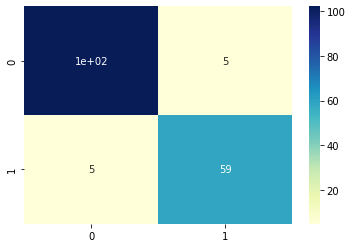

In [17]:
y_pred = svm.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)
ac_svm = accuracy_score(y_test, y_pred)
print(ac_svm)
sns.heatmap(cm_svm, annot = True, cmap = 'YlGnBu')

# Kernel SVM

In [18]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', degree = 3, random_state = 0)
ksvm.fit(X_train, y_train)

SVC(random_state=0)

[[102   5]
 [  3  61]]
0.9532163742690059


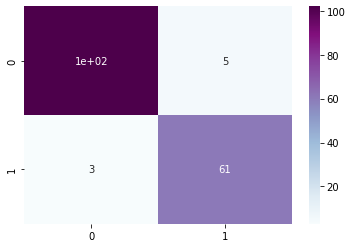

In [19]:
y_pred = ksvm.predict(X_test)
cm_ksvm = confusion_matrix(y_test, y_pred)
print(cm_ksvm)
ac_ksvm = accuracy_score(y_test, y_pred)
print(ac_ksvm)
sns.heatmap(cm_ksvm, annot = True, cmap = 'BuPu')

# Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[[103   4]
 [  3  61]]
0.9590643274853801


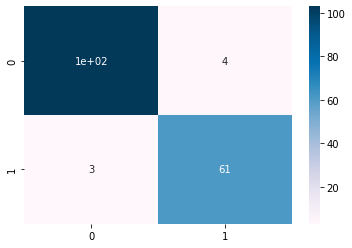

In [21]:
y_pred = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred)
print(cm_dt)
ac_dt = accuracy_score(y_test, y_pred)
print(ac_dt)
sns.heatmap(cm_dt, annot = True, cmap = 'PuBu')

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

[[103   4]
 [  5  59]]
0.9473684210526315


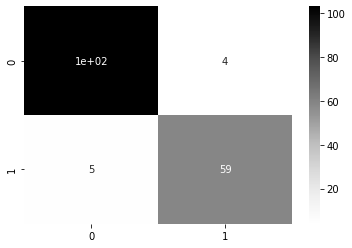

In [23]:
y_pred = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
print(cm_rf)
ac_rf = accuracy_score(y_test, y_pred)
print(ac_rf)
sns.heatmap(cm_rf, annot = True, cmap = 'Greys')